Customer Segmentation (K-Means) - Analysis

In [2]:
#importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder

from scipy.stats import kurtosis,skew,pearsonr
from scipy.cluster.hierarchy import linkage, dendrogram

from scipy.spatial.distance import cdist

In [5]:
#importing dataset

In [6]:
df = pd.read_csv("Mall_Customers.csv")

In [7]:
#dataset

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# check the missing value
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#describing the numeric feature 
df.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [12]:
#check if there any duplication 
df.duplicated().sum()

0

In [13]:
#  shape 
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 200 Rows and 5 columns


In [14]:
#Data Exploration

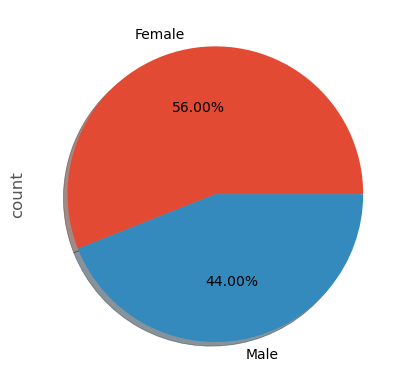

In [15]:
df["Gender"].value_counts().plot(kind="pie",autopct='%1.2f%%', shadow = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

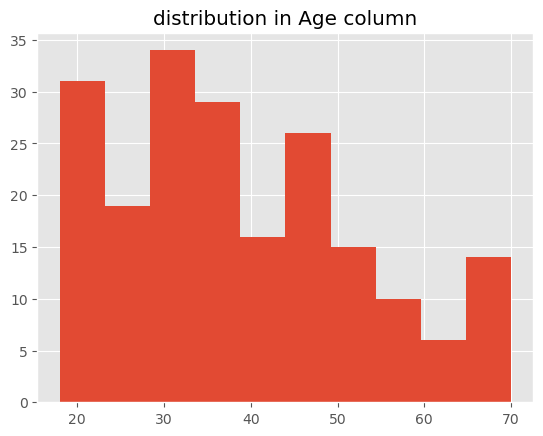

In [16]:
#histogram

plt.hist(data=df,x='Age')
plt.title("distribution in Age column")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

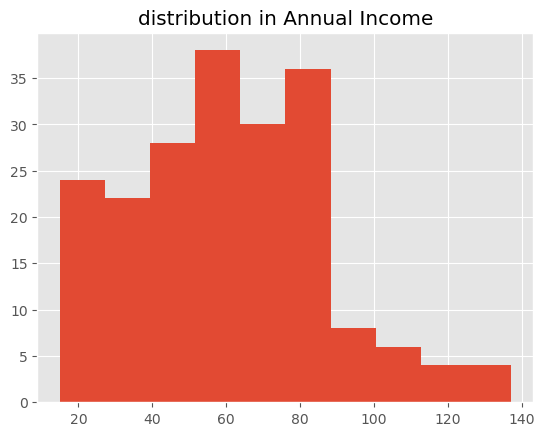

In [17]:
#Annual Income distriution

plt.hist(data=df,x="Annual Income (k$)")
plt.title("distribution in Annual Income")
plt.show

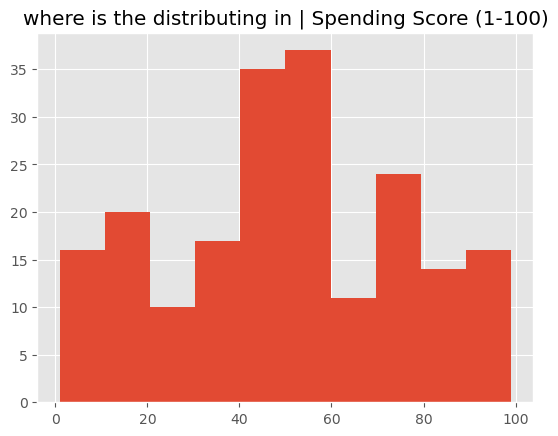

In [18]:
#Spending Score

plt.hist (data= df, x="Spending Score (1-100)")
plt.title("where is the distributing in | Spending Score (1-100)")
plt.show()

Text(0.5, 1.0, 'show the relation between Age and Income with Gender')

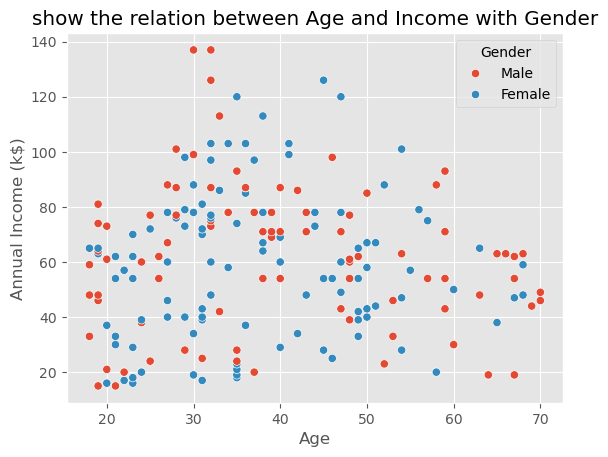

In [19]:
#Relation between Age and Income

sns.scatterplot(data=df, x="Age",y="Annual Income (k$)",hue="Gender")
plt.title("show the relation between Age and Income with Gender")

Text(0.5, 1.0, 'show the relation between Age and Spending Score (1-100) with Gender')

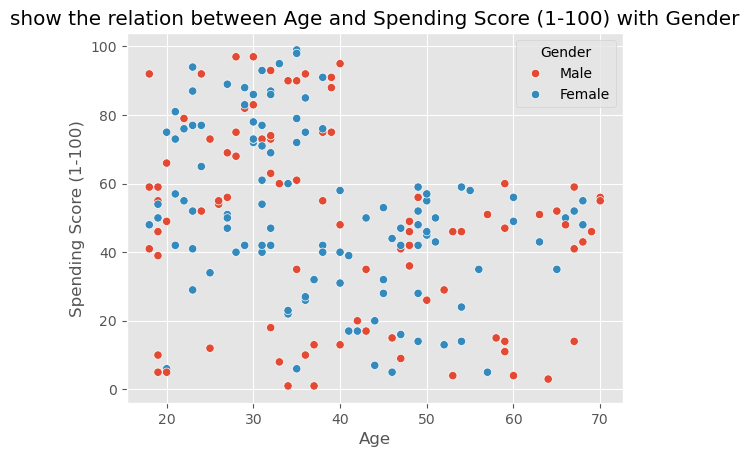

In [20]:
#Relation between Age and Spending Score 

sns.scatterplot(data=df, x="Age",y="Spending Score (1-100)",hue="Gender")
plt.title("show the relation between Age and Spending Score (1-100) with Gender")

Text(0.5, 1.0, 'show the relation between |Annual Income (k$)| and |Spending Score (1-100)| with Gender')

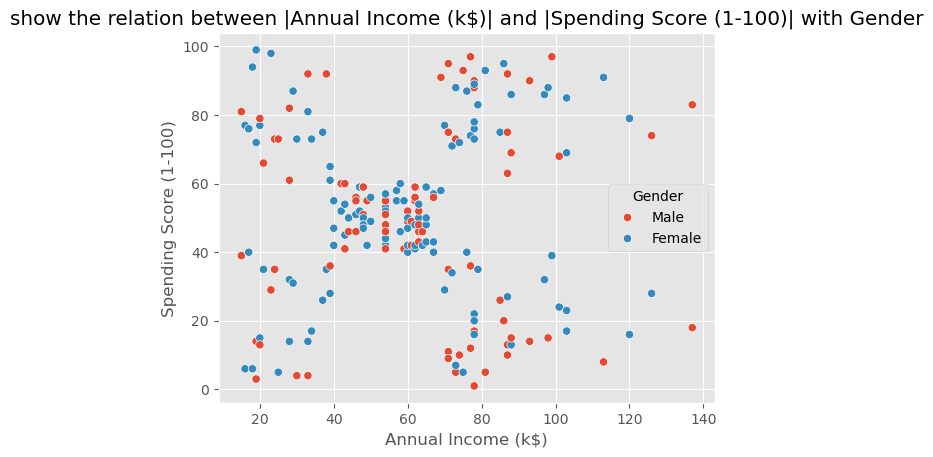

In [21]:
#Relation between Annual Income (k$)  and Spending Score (1-100) with Gender

sns.scatterplot(data=df, x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender")
plt.title("show the relation between |Annual Income (k$)| and |Spending Score (1-100)| with Gender")


Text(0.5, 0.98, 'Boxplots of the Numerical Variables')

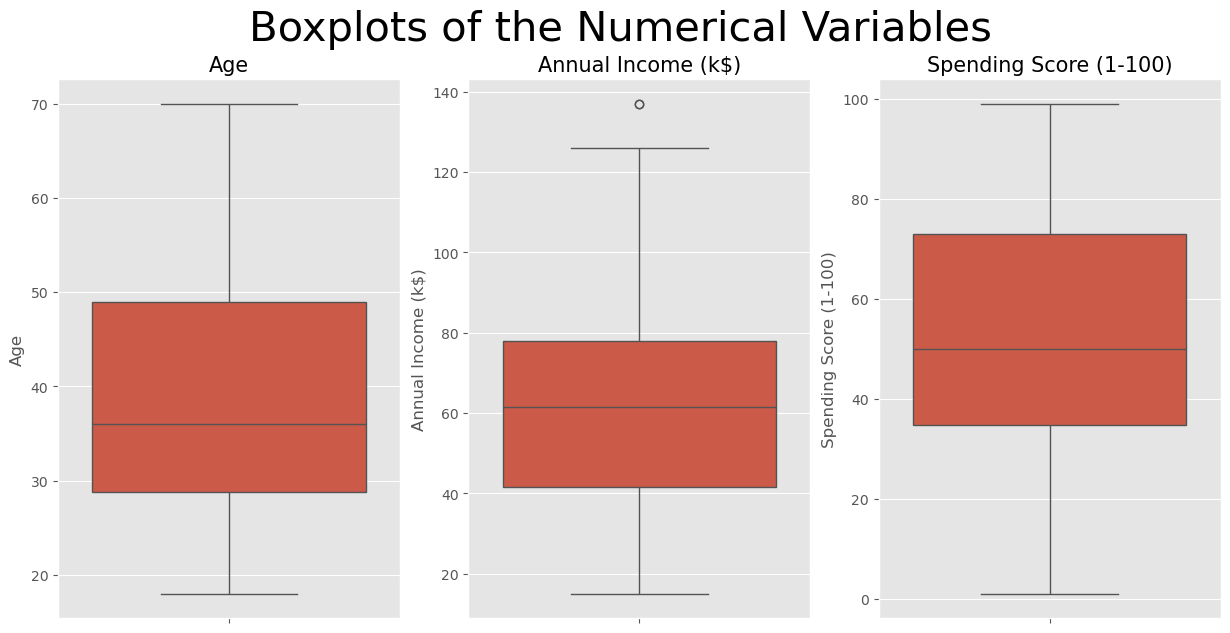

In [22]:
#checking the outlier

fig,(a1,a2,a3) = plt.subplots(ncols=3,figsize=(15,7))

a1 = sns.boxplot(df['Age'],ax=a1)
a1.set_title('Age',fontsize=15)

a2 = sns.boxplot(df['Annual Income (k$)'],ax=a2)
a2.set_title('Annual Income (k$)',fontsize=15)

a3 = sns.boxplot(df['Spending Score (1-100)'],ax=a3)
a3.set_title('Spending Score (1-100)',fontsize=15)

fig.suptitle("Boxplots of the Numerical Variables",fontsize=30)    


In [23]:
#Building Machine Learning model

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
#dropping customerID

df.drop(['CustomerID'],inplace =True,axis = 1)

In [25]:
#label Encoder for changing Gender Column

encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])

In [26]:
#show the data
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [27]:
#copying data

df_1 = df.copy()
df_2= df.copy()

In [28]:
# bulid model using KMeans 

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_1)
    kmeanModel.fit(df_1)
 
    distortions.append(sum(np.min(cdist(df_1, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_1.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_1, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_1.shape[0]
    mapping2[k] = kmeanModel.inertia_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [29]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 35.58782757352547
2 : 30.122051138558877
3 : 24.020507648685765
4 : 20.47612410788973
5 : 17.773099154184546
6 : 15.448663692811202
7 : 14.573101197758696
8 : 13.85051322464546
9 : 13.349929663242733


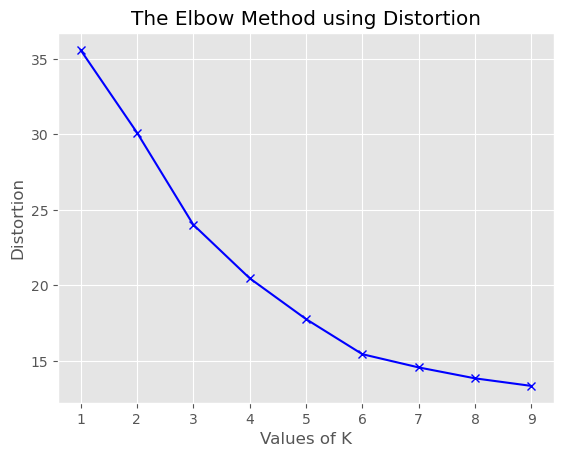

In [30]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [31]:
#Initiating the Agglomerative Clustering model 
K_C = KMeans(n_clusters=4)
# fit model and predict clusters
yhat_KC = K_C.fit_predict(df_1)
#PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_1["Clusters"]= yhat_KC


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,2


now build model with normalization

In [34]:
df_2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [35]:
scaler = StandardScaler()

scaled_columns = df_2.columns

df_2[scaled_columns] = scaler.fit_transform(df_2[scaled_columns])

df_2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [36]:
# bulid model using KMeans 

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_1)
    kmeanModel.fit(df_2)
 
    distortions.append(sum(np.min(cdist(df_2, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_2.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_2, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_2.shape[0]
    mapping2[k] = kmeanModel.inertia_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [37]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.9311679086931692
2 : 1.660605870155713
3 : 1.4596318657465737
4 : 1.2878312249775001
5 : 1.1915406324836761
6 : 1.095650208145928
7 : 0.9950110577855298
8 : 0.913846769900948
9 : 0.8518626181262534


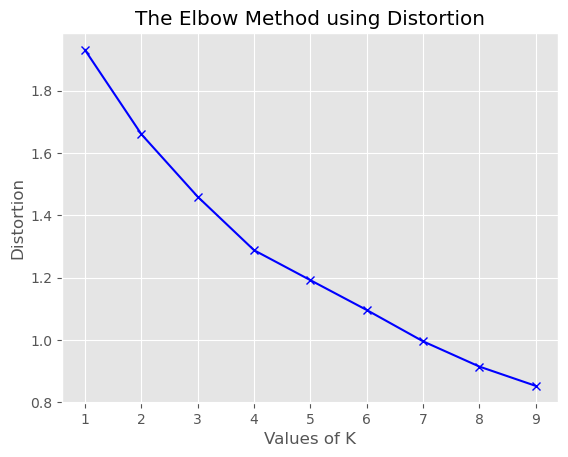

In [38]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Not big difference and scale the data I will choose 4 Elbow , 4 cluster

In [40]:
#Initiating the Agglomerative Clustering model 
K_C = KMeans(n_clusters=4)
# fit model and predict clusters
yhat_KC = K_C.fit_predict(df_2)
#PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_2["Clusters"]= yhat_KC

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df_2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1.128152,-1.424569,-1.738999,-0.434801,3
1,1.128152,-1.281035,-1.738999,1.195704,3
2,-0.886405,-1.352802,-1.700830,-1.715913,2
3,-0.886405,-1.137502,-1.700830,1.040418,0
4,-0.886405,-0.563369,-1.662660,-0.395980,0


In [42]:
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,2


Comparing Two Model

Text(0.5, 0.98, 'Comparing 2 Model')

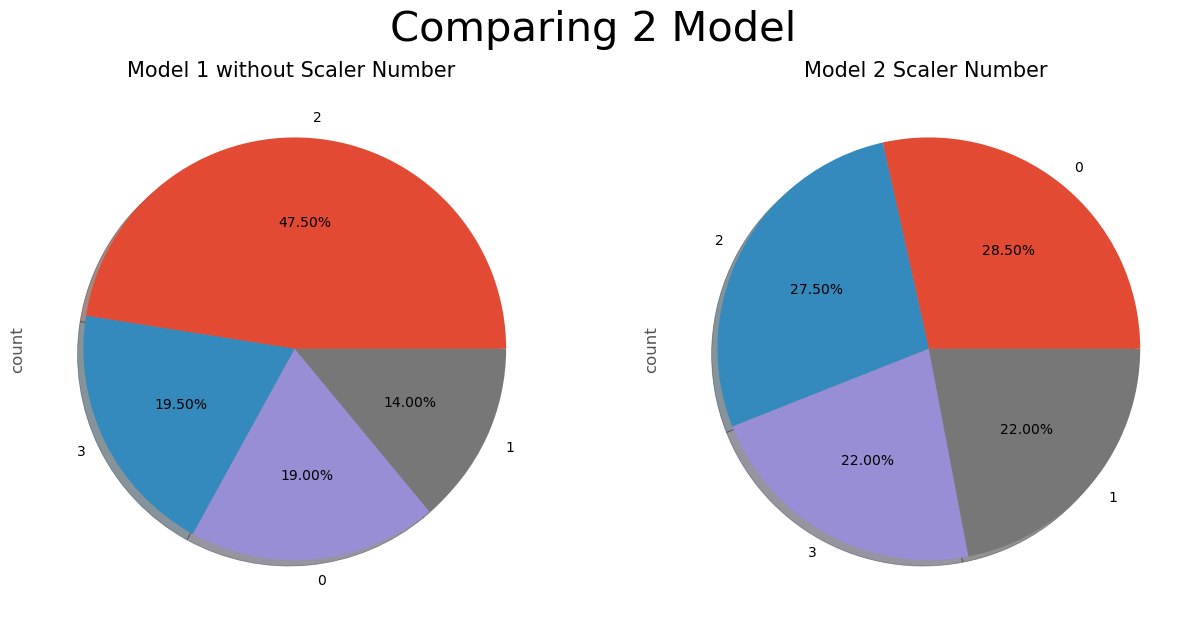

In [44]:
#cheak if there outlier

fig,(a1,a2) = plt.subplots(ncols=2,figsize=(15,7))

a1 = df_1["Clusters"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True,ax=a1)
a1.set_title('Model 1 without Scaler Number ',fontsize=15)

a2 = df_2["Clusters"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True,ax=a2)
a2.set_title('Model 2 Scaler Number ',fontsize=15)



fig.suptitle("Comparing 2 Model",fontsize=30)    

Text(0.5, 0.98, 'Comparing 2 Model')

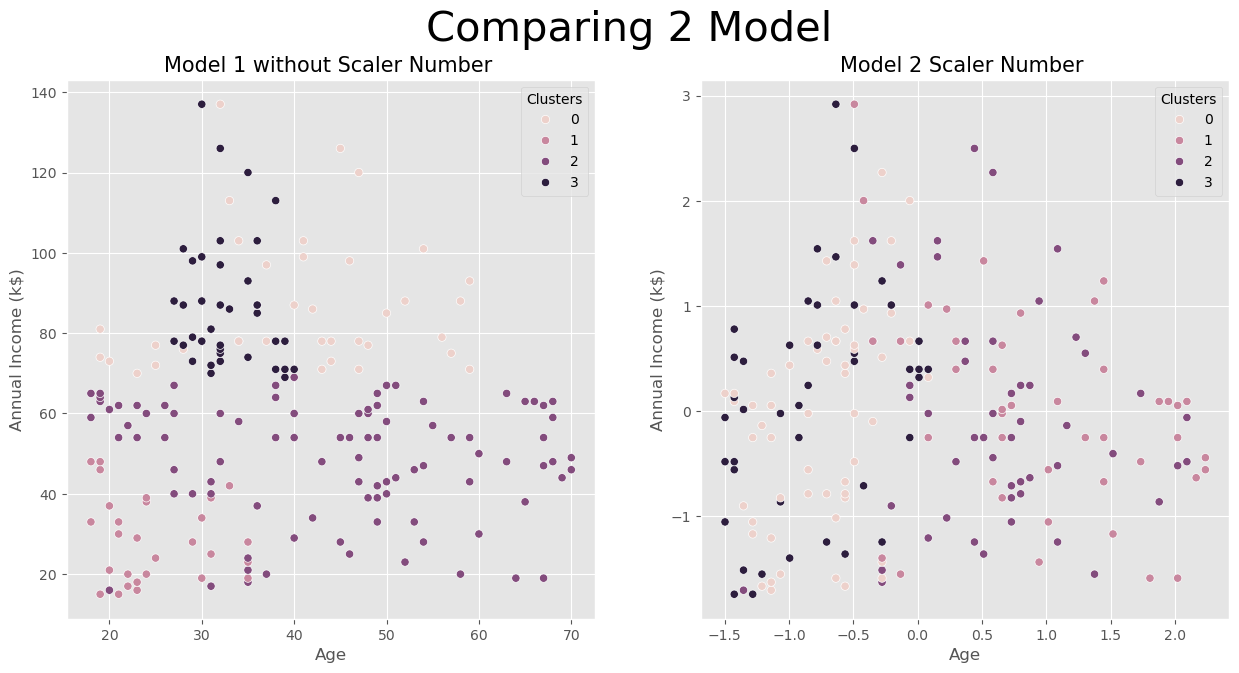

In [45]:
#cheak if there outlier

fig,(a1,a2) = plt.subplots(ncols=2,figsize=(15,7))

a1 = sns.scatterplot(df_1, x="Age", y= "Annual Income (k$)",hue="Clusters",ax=a1)
a1.set_title('Model 1 without Scaler Number ',fontsize=15)

a2 = sns.scatterplot(df_2, x="Age", y= "Annual Income (k$)",hue="Clusters",ax=a2)
a2.set_title('Model 2 Scaler Number ',fontsize=15)



fig.suptitle("Comparing 2 Model",fontsize=30)    

Text(0.5, 0.98, 'Comparing 2 Model')

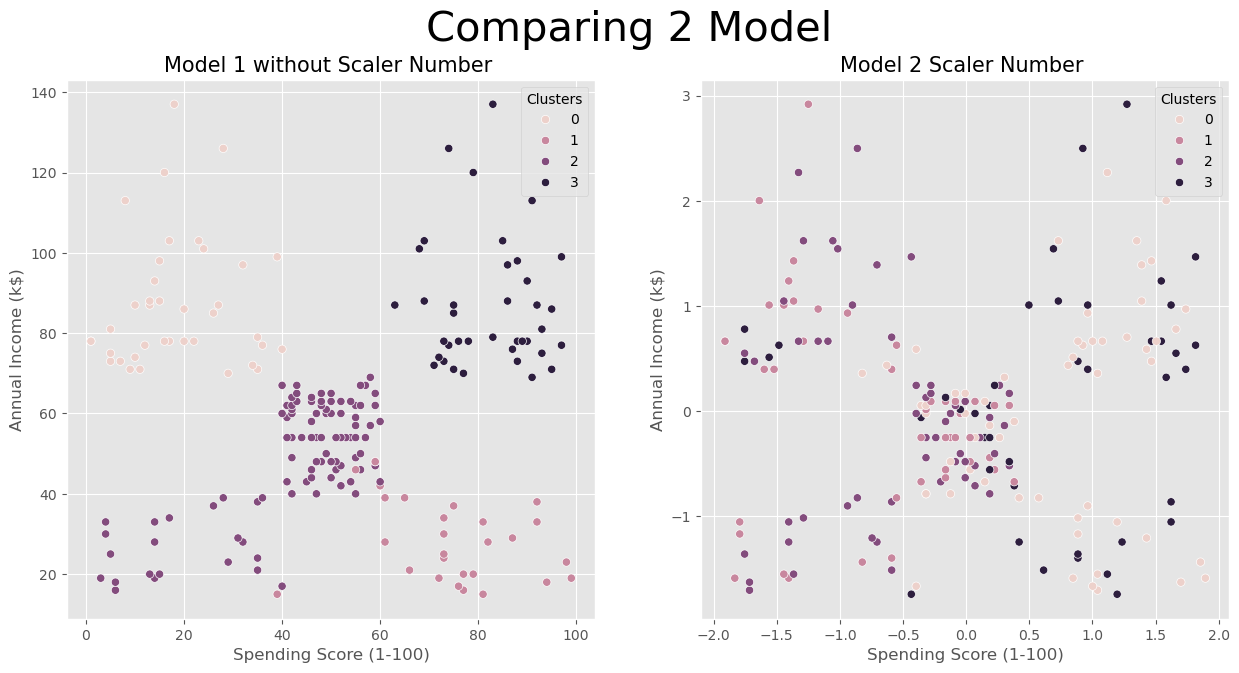

In [46]:
#cheak if there outlier

fig,(a1,a2) = plt.subplots(ncols=2,figsize=(15,7))

a1 = sns.scatterplot(df_1, x="Spending Score (1-100)", y= "Annual Income (k$)",hue="Clusters",ax=a1)
a1.set_title('Model 1 without Scaler Number ',fontsize=15)

a2 = sns.scatterplot(df_2, x="Spending Score (1-100)", y= "Annual Income (k$)",hue="Clusters",ax=a2)
a2.set_title('Model 2 Scaler Number ',fontsize=15)



fig.suptitle("Comparing 2 Model",fontsize=30)  

Text(0.5, 0.98, 'Comparing 2 Model')

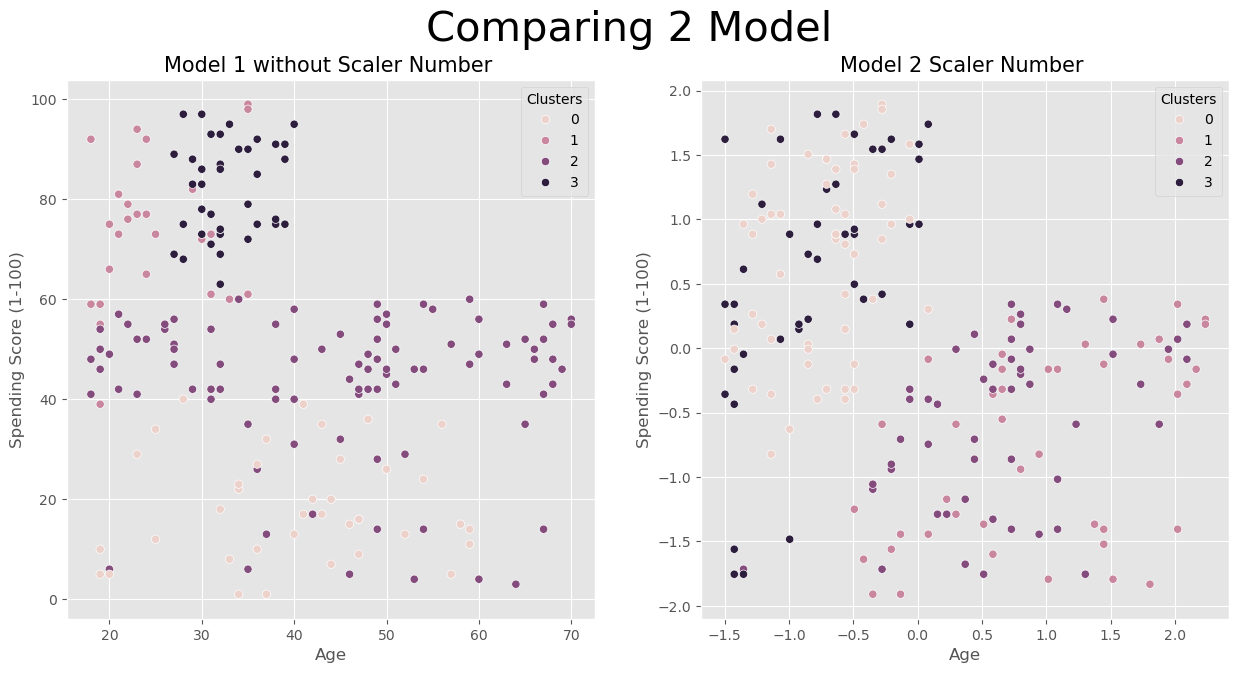

In [47]:
#cheak if there outlier

fig,(a1,a2) = plt.subplots(ncols=2,figsize=(15,7))

a1 = sns.scatterplot(df_1, x="Age", y= "Spending Score (1-100)",hue="Clusters",ax=a1)
a1.set_title('Model 1 without Scaler Number ',fontsize=15)

a2 = sns.scatterplot(df_2, x="Age", y= "Spending Score (1-100)",hue="Clusters",ax=a2)
a2.set_title('Model 2 Scaler Number ',fontsize=15)



fig.suptitle("Comparing 2 Model",fontsize=30) 

Result ML

I see the first model without any scale number better than second model
Now can cluster Customer based on the spending money